# Climate Coding Challenge

Climate change is impacting the way people live around the world

# So, is the climate changing?

## STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [1]:
# Restore boulder_annual_temp_df
%store -r boulder_annual_temp_df

## STEP 1: Quantify how fast the climate is changing with a trend line

Global climate change causes different effects in different places when
we zoom in to a local area. However, you probably noticed when you
looked at mean annual temperatures over time that they were rising. We
can use a technique called **Linear Ordinary Least Squares (OLS)
Regression** to determine how quickly temperatures are rising on
average.

Before we get started, it’s important to consider that OLS regression is
not always the right technique, because it makes some important
assumptions about our data:

Random error  
Variation in temperature can be caused by many things beyond global
climate change. For example, temperatures often vary with patterns of
ocean surface temperatures (*teleconnections*), the most famous of which
are El Niño and La Niña. By using a linear OLS regression, we’re
assuming that all the variation in temperature except for climate change
is random.

Normally distributed error  
If you have taken a statistics class, you probably learned a lot about
the normal, or Gaussian distribution. For right now, what you need to
know is that OLS regression is useful for identifying trends in average
temperature, but wouldn’t be appropriate for looking at trends in daily
precipitation (because most days have zero precipitation), or at maximum
or minimum annual temperatures (because these are extreme values, and
the normal distribution tends to underestimate the likelihood of large
events).

Linearity  
We’re assuming that temperatures are increasing or decreasing at a
constant rate over time. We wouldn’t be able to look at rates that
change over time. For example, many locations in the Arctic remained the
same temperature for much longer than the rest of the world, because ice
melt was absorbing all the extra heat. Linear OLS regression wouldn’t be
able to identify when the temperature rise began on its own.

Stationarity  
We’re assuming that variation in temperature caused by things *other*
than global climate change (e.g. the random error) behaves the same over
time. For example, the linear OLS regression can’t take increased
variability from year to year into account, which is a common effect of
climate change. We often see “global weirding”, or more extreme head
*and* cold, in addition to overall increases. You can observe this most
easily by looking at your daily data again. Does it seem to be fanning
in or out over time?

It’s pretty rare to encounter a perfect statistical model where all the
assumptions are met, but you want to be on the lookout for serious
discrepancies, especially when making predictions. For example,
[ignoring assumptions about Gaussian error arguably led to the 2008
financial crash](https://www.wired.com/2009/02/wp-quant/).

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond: Is linear OLS regression right for your data?</div></div><div class="callout-body-container callout-body"><p>Take a look at your data. In the cell below, write a few sentences
about ways your data does and does not meet the linear OLS regression
assumptions.</p></div></div>

Despite not meeting all assumptions, linear OLS regression is suitable
for showing changes in average annual temperature over time. For our
dataset, it is safe to make two assumptions: the error is nominally 
distributed, and temperature is increasing at a constant rate over time. 
Climate change is more complex than influencing warming trends globally;
it contributes to severe weather events and extreme temperature
fluctuations, so assumptions of random error and stationarity should not
be made.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import Packages</div></div><div class="callout-body-container callout-body"><p>The following cell contains package imports that you will need to
calculate and plot an OLS Linear trend line. Make sure to run the cell
before moving on, and if you have any additional packages you would like
to use, add them here later on.</p></div></div>

In [2]:
#  Advanced options on matplotlib/seaborn/pandas plots
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
# Import seaborn as sns
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Regression</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>To get sample code, ask ChatGPT how to fit a linear model to your
data. If you’re new to using large language models, go ahead and check
out <a
href="https://chatgpt.com/share/649b897b-9075-457e-8e12-308f795312a1">our
query</a></li>
<li>Copy code that uses the <code>scikit-learn</code> package to perform
a OLS linear regression to the code cell below.</li>
<li>Check out your previous plot. Does it make sense to include all the
data when calculating a trend line? Be sure to select out data that
meets the OLS assumptions.</li>
</ol></div></div>

> **Note**
>
> We know that some computers, networks, and countries block LLM (large
> language model) sites, and that LLMs can sometimes perpetuate
> oppressive or offensive language and ideas. However, LLMs are
> increasingly standard tools for programming – [according to
> GitHub](https://github.com/features/copilot) many developers code 55%
> faster with LLM assistance. We also see in our classes that LLMs give
> students the ability to work on complex real-world problems earlier
> on. We feel it’s worth the trade-off, and at this point we would be
> doing you a disservice professionally to teach you to code without
> LLMs. If you can’t access them, don’t worry – we’ll present a variety
> of options for finding example code. For example, you can also search
> for an example on a site like
> [StackOverflow](https://stackoverflow.com/) (this is how we all
> learned to code, and with the right question it’s a fantastic resource
> for any coder to get access to up-to-date information from world
> experts quickly). You can also use our solutions as a starting point.

In [3]:
boulder_annual_temp_df.index.year.values

array([1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903,
       1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914,
       1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925,
       1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936,
       1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
       1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=int32)

In [4]:
# This code was prepared with the help of ChatGPT

# Change the index from date to year and turn it into a column
# boulder_annual_temp_df is the DataFrame
boulder_annual_temp_df.index.year.values 

# Remove NaN values from input y (the temperature values)
# Rename the DataFrame to "boulder_clean_temp_df"
boulder_clean_temp_df = (
    boulder_annual_temp_df.dropna(subset=['temperature_C'])
)
boulder_clean_temp_df

# Note: Imports must be run to fit linear regression model
# Reshape the "Year" column to be a 2D array for scikit-learn
X = boulder_clean_temp_df.index.year.values.reshape(-1, 1)

# Get the temperature values using .values
y = boulder_clean_temp_df['temperature_C'].values
 
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Obtain the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the slope and intercept
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 0.018095139055852492
Intercept: -22.988033588959425


## STEP 2: Plot your trend line

Trend lines are often used to help your audience understand and process
a time-series plot. In this case, we’ve chosed mean temperature values
rather than extremes, so we think OLS is an appropriate model to use to
show a trend.

> **Is it ok to plot a trend line even if OLS isn’t an appropriate
> model?**
>
> This is a tricky issue. When it comes to a trend line, choosing a
> model that is technically more appropriate may require much more
> complex code without resulting in a noticeably different trend line.
>
> We think an OLS trend line is an ok visual tool to indicate the
> approximate direction and size of a trend. If you are showing standard
> error, making predictions or inferences based on your model, or
> calculating probabilities (p-values) based on your model, or making
> statements about the statistical significance of a trend, we’d suggest
> reconsidering your choice of model.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Regression Plot</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Add values for x (year) and y (temperature) to plot a regression
plot. You will have to select out the year from the index values, just
like you probably did when fitting your linear model above!</li>
<li>Label the axes of your plot with the <code>title</code>,
<code>xlabel</code>, and <code>ylabel</code> parameters. We’ve gotten
you started with an example that shows how to put in the degree symbol.
Make sure your labels match what you’re plotting!</li>
<li>Can you figure out how to customize the colors and line style on
your plot? Check out the <a
href="https://seaborn.pydata.org"><code>seaborn</code> documentation</a>
for ideas.</li>
</ol></div></div>

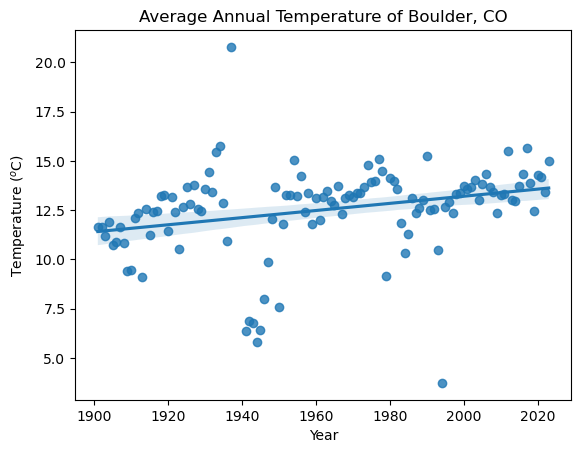

In [5]:
# Plot tne annual average temperature for Boulder with a trend line
# X-axis: Year; Y-axis: Temperature (in Celsius)
ax = sns.regplot(
    x=boulder_annual_temp_df.index.year,
    y=boulder_annual_temp_df.temperature_C
)
# Label the title and axes
ax.set(
    title='Average Annual Temperature of Boulder, CO',
    xlabel='Year',
    ylabel='Temperature ($^o$C)'
)
# Display the plot without extra text
plt.show()

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond: Interpret the trend</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Create a new Markdown cell below this one.</li>
<li>Write a plot headline. Your headline should
<strong>interpret</strong> your plot, unlike a caption which neutrally
describes the image.</li>
<li>Is the climate changing? How much? Report the slope of your trend
line.</li>
</ol></div></div>

Over time, climate change has increased the average annual 
temperature in Boulder, CO.

The climate is becoming warmer in Boulder, CO. On average, its average 
annual temperature is increasing by 0.018°C each year; this amounts to
an average increase of 0.18°C every decade and 1.8°C every century. 
Unfortunately, this is reflected in the start and endpoints of the
graph: the average annual temperature was 11.62°C in 1901 and 15°C in
2023. This may suggest that the climate is warming faster than 
projected, but linear OLS regression plots cannot account for 
acceleration, only linearity. Furthermore, the plot shows the average 
annual temperature has been in flux in recent years—an unfortunate 
byproduct of climate change.